In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
# import matplotlib.pyplot as plt
# %matplotlib inline
import numpy as np

import pathlib
# import PIL
# import cv2

In [3]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train[0].shape

(28, 28)

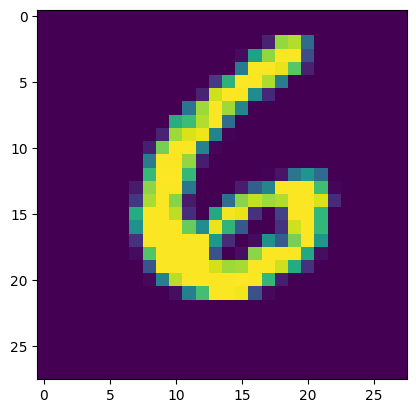

In [4]:
plt.imshow(x_train[90])


In [5]:
x_train = x_train/255
x_test = x_test/255

In [6]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_train_flattened.shape

(60000, 784)

In [7]:
x_test_flattened = x_test.reshape(len(x_test),28*28)
x_test_flattened.shape

(10000, 784)

In [8]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    #dense
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10,activation='softmax')
])

In [9]:
cnn.compile(optimizer='nadam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
cnn.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 42s 5ms/step - loss: 0.1366 - accuracy: 0.9585
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0444 - accuracy: 0.9862
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0302 - accuracy: 0.9901
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0230 - accuracy: 0.9927
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0169 - accuracy: 0.9945


In [11]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0306 - accuracy: 0.9906


[0.0306231789290905, 0.9905999898910522]

In [12]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = cnn.predict(x_test)
y_pred_classes = [np.argmax(x) for x in y_pred]

print('classification Report: \n', classification_report(y_test,y_pred_classes))

classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [15]:
data_dir = pathlib.Path('.\\images')
data_dir

WindowsPath('images')

In [16]:
numbers = ["zero","one","two","three","four","five","six","seven","eight","nine"]
X,y = [],[]
for i in range(10):
    collected = list(data_dir.glob(f'*{numbers[i]}*.png'))
    for j in collected:
        img = cv2.imread(str(j))
        img = cv2.resize(img,(28,28))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img = 255 - img
        img = img/255
        X.append(img)
        y.append(i)


In [17]:
X = np.array(X)
y = np.array(y)

In [18]:
X.shape

(2356, 28, 28)

In [19]:
from sklearn.model_selection import train_test_split
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(X,y, test_size=0.2, random_state=2)

In [20]:
inputs = cnn.input
outputs = cnn.layers[-2].output
feature_model = tf.keras.Model(inputs=inputs, outputs=outputs)

new_model = tf.keras.Sequential()
new_model
# Set layers as non-trainable
for layer in feature_model.layers:
    layer.trainable = False
    new_model.add(layer)
new_model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [21]:
new_model.compile(optimizer='nadam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

new_model.fit(x_train_new,y_train_new,epochs = 40)

Epoch 1/40
59/59 [==============================] - 1s 12ms/step - loss: 4.7531 - accuracy: 0.1895
Epoch 2/40
59/59 [==============================] - 0s 4ms/step - loss: 2.0089 - accuracy: 0.3795
Epoch 3/40
59/59 [==============================] - 0s 5ms/step - loss: 1.1151 - accuracy: 0.6502
Epoch 4/40
59/59 [==============================] - 0s 5ms/step - loss: 0.8513 - accuracy: 0.7463
Epoch 5/40
59/59 [==============================] - 0s 4ms/step - loss: 0.7373 - accuracy: 0.7824
Epoch 6/40
59/59 [==============================] - 0s 4ms/step - loss: 0.6715 - accuracy: 0.8079
Epoch 7/40
59/59 [==============================] - 0s 4ms/step - loss: 0.6254 - accuracy: 0.8238
Epoch 8/40
59/59 [==============================] - 0s 3ms/step - loss: 0.5912 - accuracy: 0.8339
Epoch 9/40
59/59 [==============================] - 0s 3ms/step - loss: 0.5635 - accuracy: 0.8439
Epoch 10/40
59/59 [==============================] - 0s 3ms/step - loss: 0.5415 - accuracy: 0.8466
Epoch 11/40
59/59 

In [22]:
cnn.evaluate(x_test_new,y_test_new)

15/15 [==============================] - 0s 8ms/step - loss: 1.3081 - accuracy: 0.7903


[1.308149814605713, 0.7902542352676392]

In [23]:
new_model.evaluate(x_test_new,y_test_new)

15/15 [==============================] - 0s 3ms/step - loss: 0.5012 - accuracy: 0.8771


[0.5012348890304565, 0.8771186470985413]

In [24]:
y_pred_new = cnn.predict(x_test_new)
y_pred_classes_new = [np.argmax(x) for x in y_pred_new]

print('classification Report: \n', classification_report(y_test_new,y_pred_classes_new))

classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.79      0.84        57
           1       0.71      0.81      0.76        42
           2       0.77      0.76      0.76        45
           3       0.62      0.89      0.73        38
           4       0.74      0.71      0.73        45
           5       0.83      0.85      0.84        41
           6       0.75      0.84      0.79        32
           7       0.77      0.69      0.73        48
           8       0.90      0.85      0.88        54
           9       0.88      0.76      0.82        70

    accuracy                           0.79       472
   macro avg       0.79      0.80      0.79       472
weighted avg       0.80      0.79      0.79       472



In [25]:
y_pred_new = new_model.predict(x_test_new)
y_pred_classes_new = [np.argmax(x) for x in y_pred_new]

print('classification Report: \n', classification_report(y_test_new,y_pred_classes_new))

classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        57
           1       0.79      0.90      0.84        42
           2       0.89      0.89      0.89        45
           3       0.85      0.87      0.86        38
           4       0.92      0.78      0.84        45
           5       1.00      0.85      0.92        41
           6       0.77      0.94      0.85        32
           7       0.82      0.88      0.85        48
           8       0.91      0.91      0.91        54
           9       0.93      0.90      0.91        70

    accuracy                           0.88       472
   macro avg       0.88      0.88      0.87       472
weighted avg       0.88      0.88      0.88       472



In [26]:
for i in range(1,100):
    print(y_test_new[i],y_pred_classes_new[i],f"{int(10000*max(y_pred_new[i]))/100}%")

1 1 50.62%
8 8 99.61%
8 8 99.98%
0 0 99.6%
4 2 64.6%
1 1 91.01%
4 4 98.21%
4 4 49.71%
2 4 96.53%
5 5 99.7%
0 0 92.63%
7 7 45.68%
4 4 71.67%
1 1 47.85%
2 2 99.82%
4 4 62.88%
0 0 99.91%
5 1 22.75%
2 2 99.95%
6 6 95.34%
2 2 99.83%
7 7 88.76%
4 6 46.27%
1 1 99.85%
9 9 79.01%
7 7 80.26%
1 1 46.86%
9 9 57.64%
8 8 99.96%
4 4 99.72%
9 9 99.65%
9 1 60.81%
4 4 82.36%
2 2 40.54%
0 0 97.6%
8 8 99.67%
4 4 96.95%
5 7 72.47%
8 8 55.89%
2 2 99.97%
9 9 98.51%
4 4 91.11%
0 0 98.83%
8 8 97.64%
3 6 40.04%
0 0 95.51%
1 1 65.27%
9 9 99.6%
3 3 97.38%
5 7 46.09%
0 0 96.33%
7 7 95.83%
2 8 33.91%
7 7 80.44%
1 1 99.92%
4 4 99.87%
7 7 91.02%
0 0 99.39%
6 6 94.34%
4 4 96.22%
6 8 29.57%
4 7 57.92%
0 0 99.95%
6 6 98.09%
0 0 96.15%
5 5 66.79%
9 9 94.68%
7 0 36.55%
1 1 99.49%
9 9 99.47%
2 2 97.71%
0 0 99.9%
7 7 99.28%
3 3 99.96%
1 1 99.43%
5 5 98.86%
0 0 99.95%
1 1 99.88%
5 5 99.8%
8 8 99.82%
4 4 99.39%
5 5 99.21%
8 8 49.3%
2 2 98.72%
9 9 99.17%
1 0 37.39%
2 2 82.89%
3 3 91.49%
6 6 95.3%
8 8 73.62%
9 9 99.48%
3 3 98.4

In [27]:
import os.path
if os.path.isfile('/model.h5') is False:
    new_model.save('model.h5')